In [1]:
# Starter Code to Generate Random Geographic Coordinates and a List of Cities
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#Generate the Cities List by Using the citipy Library
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [3]:
# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and LatitudeUse the 
# OpenWeatherMap API to retrieve weather data from the cities list generated in the started code
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | touros
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | santiago del torno
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | khuzdar
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | kantharalak
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | labuan
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 1 | vingt cinq
City not foun

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,18.05,63,20,2.11,CL,1738509219
1,tazovsky,67.4667,78.7000,-29.72,93,13,3.85,RU,1738509220
2,touros,-5.1989,-35.4608,30.94,58,59,6.61,BR,1738509221
3,kavaratti,10.5669,72.6420,27.62,77,80,3.26,IN,1738509223
4,papatowai,-46.5619,169.4708,9.66,76,100,3.24,NZ,1738509224


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,18.05,63,20,2.11,CL,1738509219
1,tazovsky,67.4667,78.7000,-29.72,93,13,3.85,RU,1738509220
2,touros,-5.1989,-35.4608,30.94,58,59,6.61,BR,1738509221
3,kavaratti,10.5669,72.6420,27.62,77,80,3.26,IN,1738509223
4,papatowai,-46.5619,169.4708,9.66,76,100,3.24,NZ,1738509224


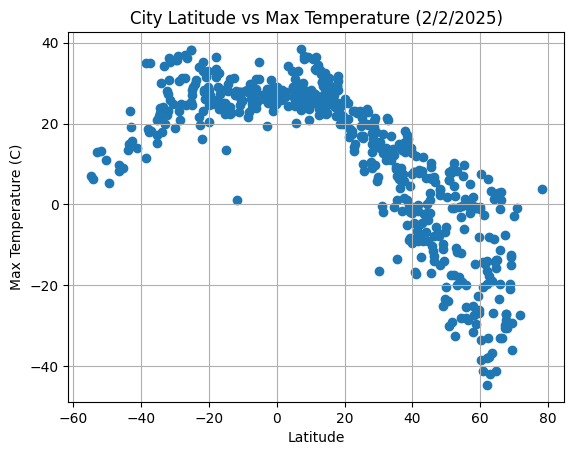

In [3]:
# Create the Scatter Plots Requested
# Latitude Vs. Temperature
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Max Temperature (2/2/2025)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

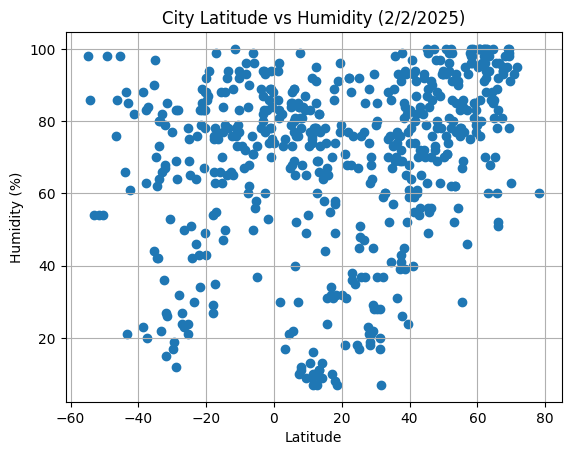

In [4]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity)
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2/2/2025)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

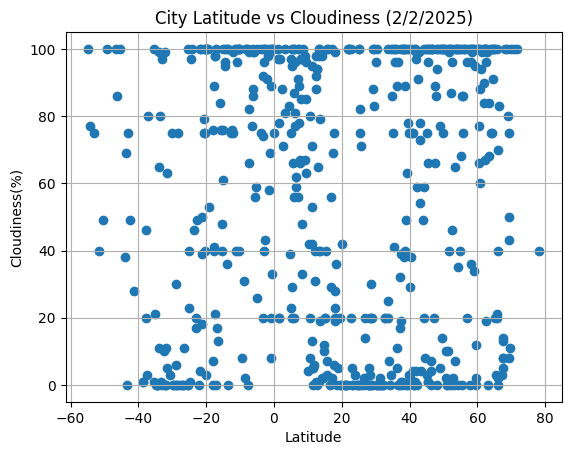

In [5]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness)
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2/2/2025)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

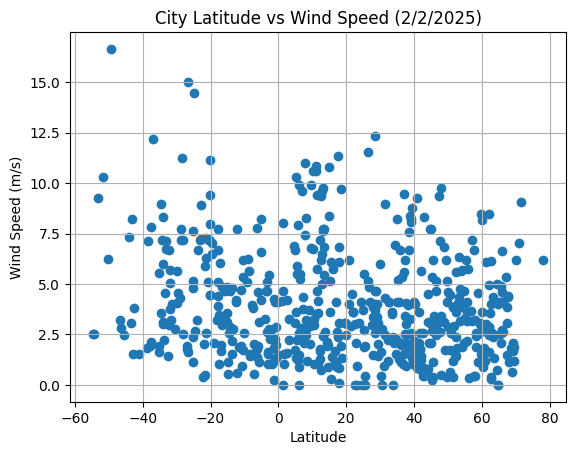

In [6]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed)
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2/2/2025)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [7]:
# Requirement 2: Compute Linear Regression for Each Relationship
# Define a function to create Linear Regression plots
def lin_regress_calc(xvalues, yvalues,text_location,title):
    (slope, intercept, r_value, p_value, std_err) = linregress(xvalues, yvalues)
    regress_values = xvalues*slope+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, regress_values, "r-")
    plt.annotate(line_eq,xy=text_location, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs.{title}")
    print(f"The r^2-value is: {r_value**2}")
    plt.show()

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tazovsky,67.4667,78.7000,-29.72,93,13,3.85,RU,1738509220
3,kavaratti,10.5669,72.6420,27.62,77,80,3.26,IN,1738509223
6,aykhal,66.0000,111.5000,-33.03,92,70,2.73,RU,1738509226
7,georgetown,5.4112,100.3354,27.96,68,20,2.24,MY,1738509227
9,khuzdar,27.7384,66.6434,10.57,23,0,2.95,PK,1738509229


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,18.05,63,20,2.11,CL,1738509219
2,touros,-5.1989,-35.4608,30.94,58,59,6.61,BR,1738509221
4,papatowai,-46.5619,169.4708,9.66,76,100,3.24,NZ,1738509224
5,santiago del torno,-17.9833,-63.3833,36.47,27,0,3.21,BO,1738509225
8,carnarvon,-24.8667,113.6333,28.31,65,1,14.45,AU,1738509228


The r^2-value is: 0.7493116455238417


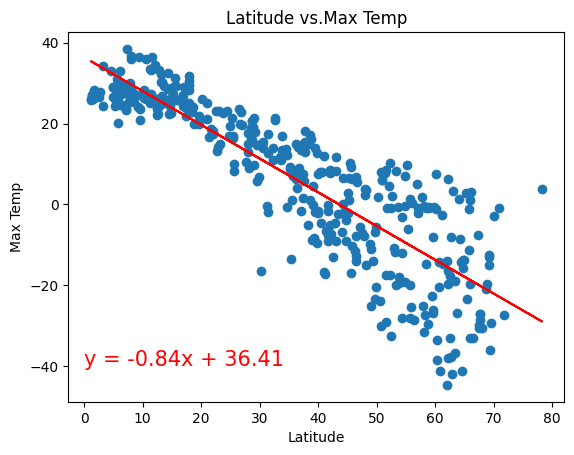

In [10]:
# Temperature vs. Latitude Linear Regression Plot
# Linear regression on Northern Hemisphere
lin_regress_calc(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],(0,-40),"Max Temp")

The r^2-value is: 0.18216859185555098


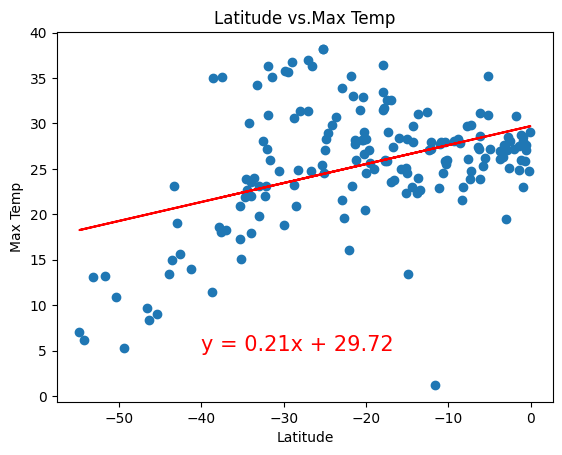

In [11]:
# Linear regression on Southern Hemisphere
lin_regress_calc(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],(-40,5),"Max Temp")

In [12]:
# Discussion about the linear relationship: The linear relationship is showing temperature is higher near latitude 0 (the equator) for both hemispheres.
# In the northern hemisphere temperatures drop while going further away from latitude 0 (going north of the equator) and 
# in the southern hemispher temperatures raise while approaching latitude 0 (approaching equator from south pole)
# these findings make sense

The r^2-value is: 0.17300165204503654


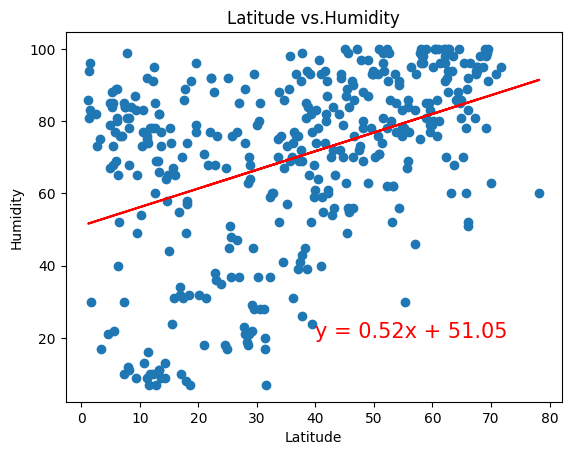

In [13]:
# Humidity vs. Latitude Linear Regression Plot
# Northern Hemisphere
lin_regress_calc(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],(40,20),"Humidity")

The r^2-value is: 0.0633244697166845


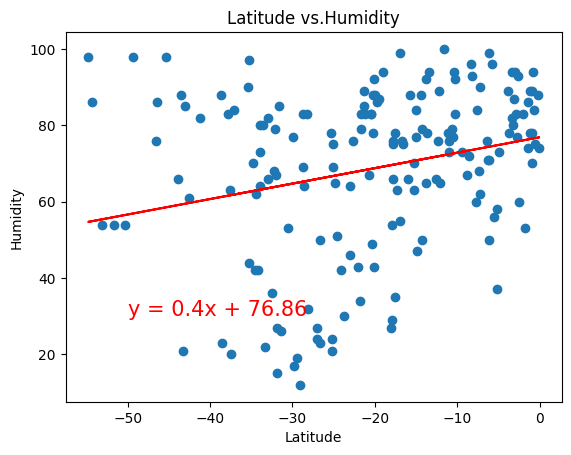

In [14]:
# Southern Hemisphere
lin_regress_calc(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],(-50,30),"Humidity")

In [15]:
# Discussion about the linear relationship: The linear relationship is showing humidity increases the further
# north you travel, this doesn't make sense and it appears the Latitude v Humidity for Southern Hemispher is
# not a good model given the r squared value

The r^2-value is: 0.009695534012818465


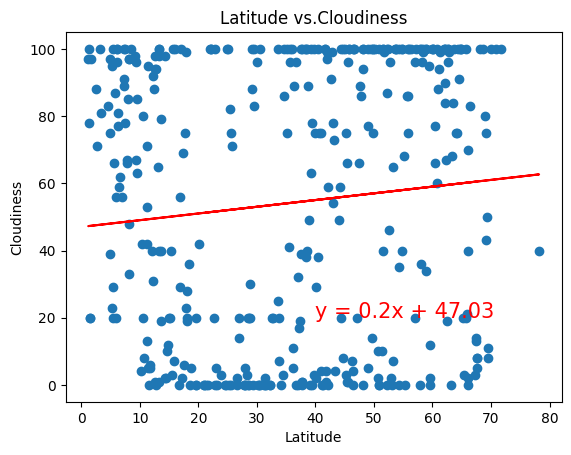

In [16]:
# Cloudiness vs. Latitude Linear Regression Plot
# Northern Hemisphere
lin_regress_calc(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],(40,20),"Cloudiness")

The r^2-value is: 0.0940129856479389


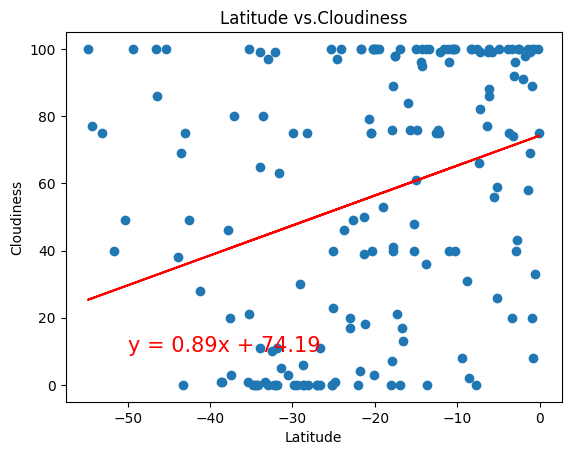

In [17]:
# Southern Hemisphere
lin_regress_calc(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],(-50,10),"Cloudiness")

In [18]:
# Discussion about the linear relationship: This is showing gloudiness goes up the further north you go which
# does not make sense, both these have low r squared values indicating this is not a good model

The r^2-value is: 0.018881069530425065


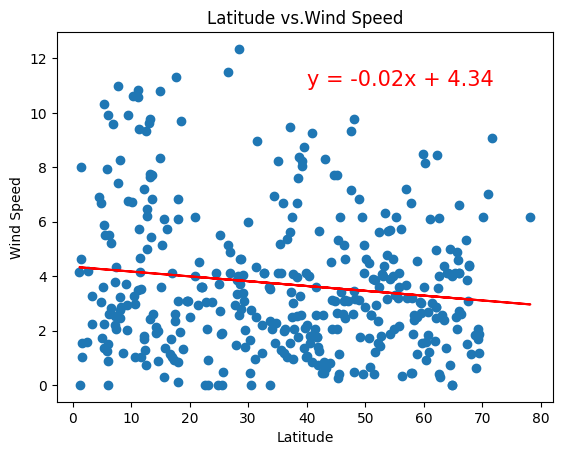

In [19]:
# Wind Speed vs. Latitude Linear Regression Plot
# Northern Hemisphere
lin_regress_calc(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],(40,11),"Wind Speed")

The r^2-value is: 0.09802682624786632


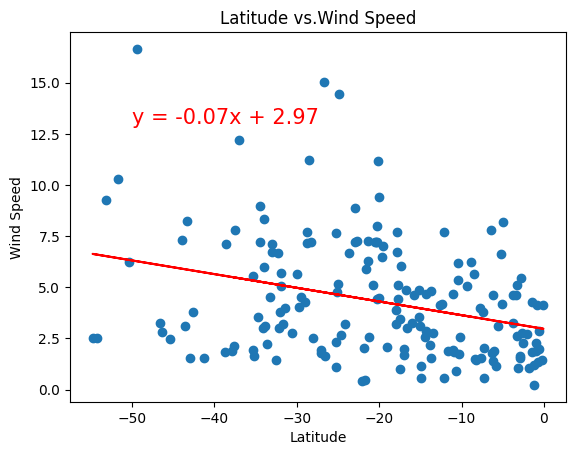

In [20]:
# Southern Hemisphere
lin_regress_calc(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],(-50,13),"Wind Speed")

In [21]:
# Discussion about the linear relationship: This states wind speed decreases the further north you go, appears
# this is not a good model given the r squared values